<a href="https://colab.research.google.com/github/krakowiakpawel9/ml_course/blob/master/ul/19_tmp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### scikit-learn
Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  

Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn
```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```
Kurs stworzony w oparciu o wersję `0.22.1`

### Spis treści:
1. [Import bibliotek](#0)
2. [Wygenerowanie danych](#1)
3. [Wizualizacja danych](#2)
4. [Algorytm K-średnich](#3)
5. [Wizualizacja klastrów](#4)




### <a name='0'></a> Import bibliotek

In [0]:
import pandas as pd
import plotly.express as px

In [2]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/master/examples/example_air_passengers.csv', parse_dates=['ds'])
data = raw_data.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
ds    144 non-null datetime64[ns]
y     144 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [3]:
data.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [17]:
# wyraźna cykliczność roczna
px.scatter(data, x='ds', y='y', template='plotly_dark', color_discrete_sequence=['#41dbfa'], width=950)

In [5]:
px.line(data, x='ds', y='y', template='plotly_dark', color_discrete_sequence=['#41dbfa'], width=950)

In [0]:
from fbprophet import Prophet

Prophet?

In [7]:
model = Prophet(seasonality_mode='additive')
model.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
future = model.make_future_dataframe(periods=50, freq='MS')
future

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
189,1964-10-01
190,1964-11-01
191,1964-12-01
192,1965-01-01


In [9]:
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.146447,55.458944,111.563817,107.146447,107.146447,-21.478579,-21.478579,-21.478579,-21.478579,-21.478579,-21.478579,0.0,0.0,0.0,85.667868
1,1949-02-01,109.300675,51.421963,107.499158,109.300675,109.300675,-30.124122,-30.124122,-30.124122,-30.124122,-30.124122,-30.124122,0.0,0.0,0.0,79.176553
2,1949-03-01,111.246429,82.836861,137.904511,111.246429,111.246429,-0.407098,-0.407098,-0.407098,-0.407098,-0.407098,-0.407098,0.0,0.0,0.0,110.839332
3,1949-04-01,113.400657,79.373127,136.013085,113.400657,113.400657,-4.928447,-4.928447,-4.928447,-4.928447,-4.928447,-4.928447,0.0,0.0,0.0,108.472210
4,1949-05-01,115.485393,81.967032,138.236922,115.485393,115.485393,-3.631263,-3.631263,-3.631263,-3.631263,-3.631263,-3.631263,0.0,0.0,0.0,111.854130


In [11]:
from fbprophet.plot import plot_plotly

plot_plotly(model, forecast)

In [12]:
import plotly.graph_objects as go

fig = go.Figure()

trace1 = plot_plotly(model, forecast)['data'][0]
trace2 = plot_plotly(model, forecast)['data'][1]
trace3 = plot_plotly(model, forecast)['data'][2]
trace4 = plot_plotly(model, forecast)['data'][3]

fig.add_trace(trace1)
fig.add_trace(trace2)
fig.add_trace(trace3)
fig.add_trace(trace4)

fig.update_layout(width=950)

Sezonowość zbyt duża na początku, zbyt mała na końcu. Sezenowość nie jest stałym czynnikiem addytywnym i rośnie wraz z trendem.

In [13]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
forecast = model.predict(future)
plot_plotly(model, forecast)

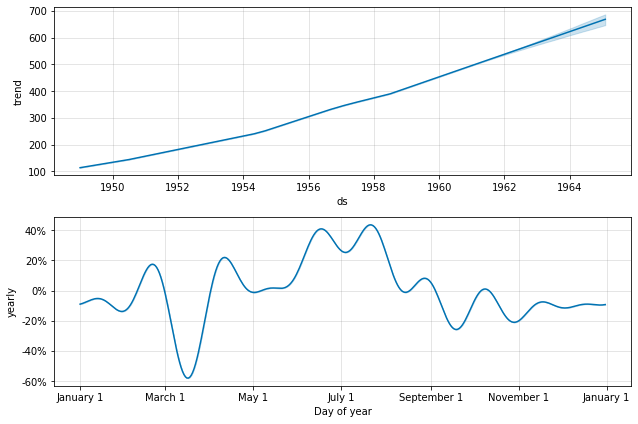

In [16]:
_ = model.plot_components(forecast)